curve 1 with koeff 0.013710100482052788
curve 2 with koeff -0.008947017284401443
curve 3 with koeff 0.02353248345947427
curve 4 with koeff 0.011096611931311586
curve 5 with koeff 0.009518200168910118
curve 6 with koeff 0.006400043813716131


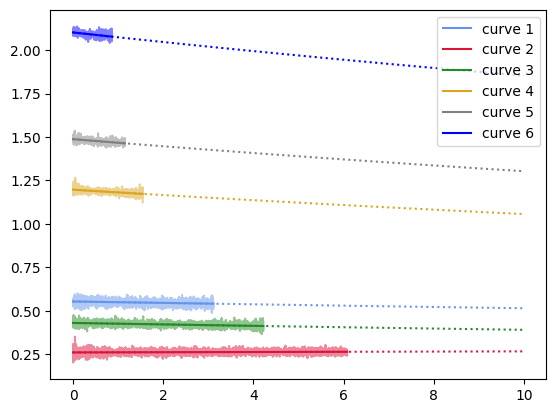

In [1]:
from data_parser import read_data

import matplotlib.pyplot as plt
import numpy as np

colors = ['cornflowerblue', 'crimson', 'forestgreen', 'goldenrod', 'gray', 'blue', 'pink']

for i in range(1, 7):
    obj_names, ts, objs = read_data(f"data/Dag1/1Drm_h23-3g_{i}.tsv")
    xs, ys, zs = objs[0]
    dxs = np.array(xs[1:])-np.array(xs[:-1])
    dys = np.array(ys[1:])-np.array(ys[:-1])
    vs = np.sqrt(dxs**2 + dys**2)
    ts0 = np.array(ts[:-1]) - ts[0]
    vse = np.linalg.lstsq(np.matrix([np.ones(ts0.size), ts0]).T, 1.0/vs)
    plt.plot(ts0, vs, alpha=0.5, color=colors[i-1])
    plt.plot(ts0, 1/(vse[0][0] + vse[0][1]*ts0), label=f'curve {i}', color=colors[i-1])
    plt.plot(np.linspace(0, 10), 1/(vse[0][0] + vse[0][1]*np.linspace(0, 10)), color=colors[i-1], linestyle=':')
    print(f'curve {i} with koeff {vse[0][1]}')

plt.legend()
plt.show()